In [116]:
import pandas as pd
import matplotlib.pyplot as plt

In [125]:
sales = pd.read_csv('invoice.csv')
customers = pd.read_json('customer_data.json')

# Easy 

1. How many unique customers are in the dataset?

In [156]:
uc = sales['customer_id'].nunique()
print(f"there are {uc} unique customers in the dataset.")

there are 5191 unique customers in the dataset.


2. What are the different categories of products available? How many unique categories are there?

In [157]:
'different categories'

cat = sales['category'].unique().tolist()
print(f"The different categories of products are: {', '.join(cat)}.")

The different categories of products are: Clothing, Shoes, Books, Cosmetics, Food & Beverage, Toys, Technology, Souvenir.


In [158]:
'number of unique categories'

ucat = sales['category'].nunique()
print(f"There are {ucat} different categories.")

There are 8 different categories.


3. Which payment method is the most popular? How many times was it used?

In [160]:
'most popular payment method'

mppm = sales['payment_method'].value_counts().head(1).index[0]
print(f"The most popular payment method is {mppm}.")

The most popular payment method is Cash.


In [161]:
'how many times it was used'

mppmfreq = sales['payment_method'].value_counts().head(1).values[0]
print(f"It was used {mppmfreq} times.")

It was used 44447 times.


# Medium

1. What are the three most popular categories, by total sales?

In [136]:
sales['total_sales'] = sales['quantity'] * sales['price']

In [162]:
pop3 = sales.groupby(['category'])['total_sales'].sum().nlargest(3).index.tolist()
print(f"The three most popular categories by total sales are: {', '.join(pop3)}.")

The three most popular categories by total sales are: Clothing, Shoes, Technology.


2. What are the total sales attributed to customers over the age of 45?

In [138]:
customers_age = customers.loc[:,['id','age']]

In [139]:
merged_sales = pd.merge(sales, customers_age, left_on='customer_id', right_on='id', how='left')

In [163]:
sage = merged_sales[merged_sales['age'] > 45]['total_sales'].sum()
print(f"The total sales attributed to customers over the age of 45 is {sage}.")

The total sales attributed to customers over the age of 45 is 82039768.15.


3. How is the data distributed across different invoice dates? Are there any seasonal trends or patterns? (Use a graph for this.)

In [141]:
sales['invoice_datetime'] = pd.to_datetime(sales['invoice_date'], dayfirst=True)

In [144]:
date_sales = sales.sort_values(['invoice_datetime']).groupby(['invoice_datetime'])['total_sales'].sum()

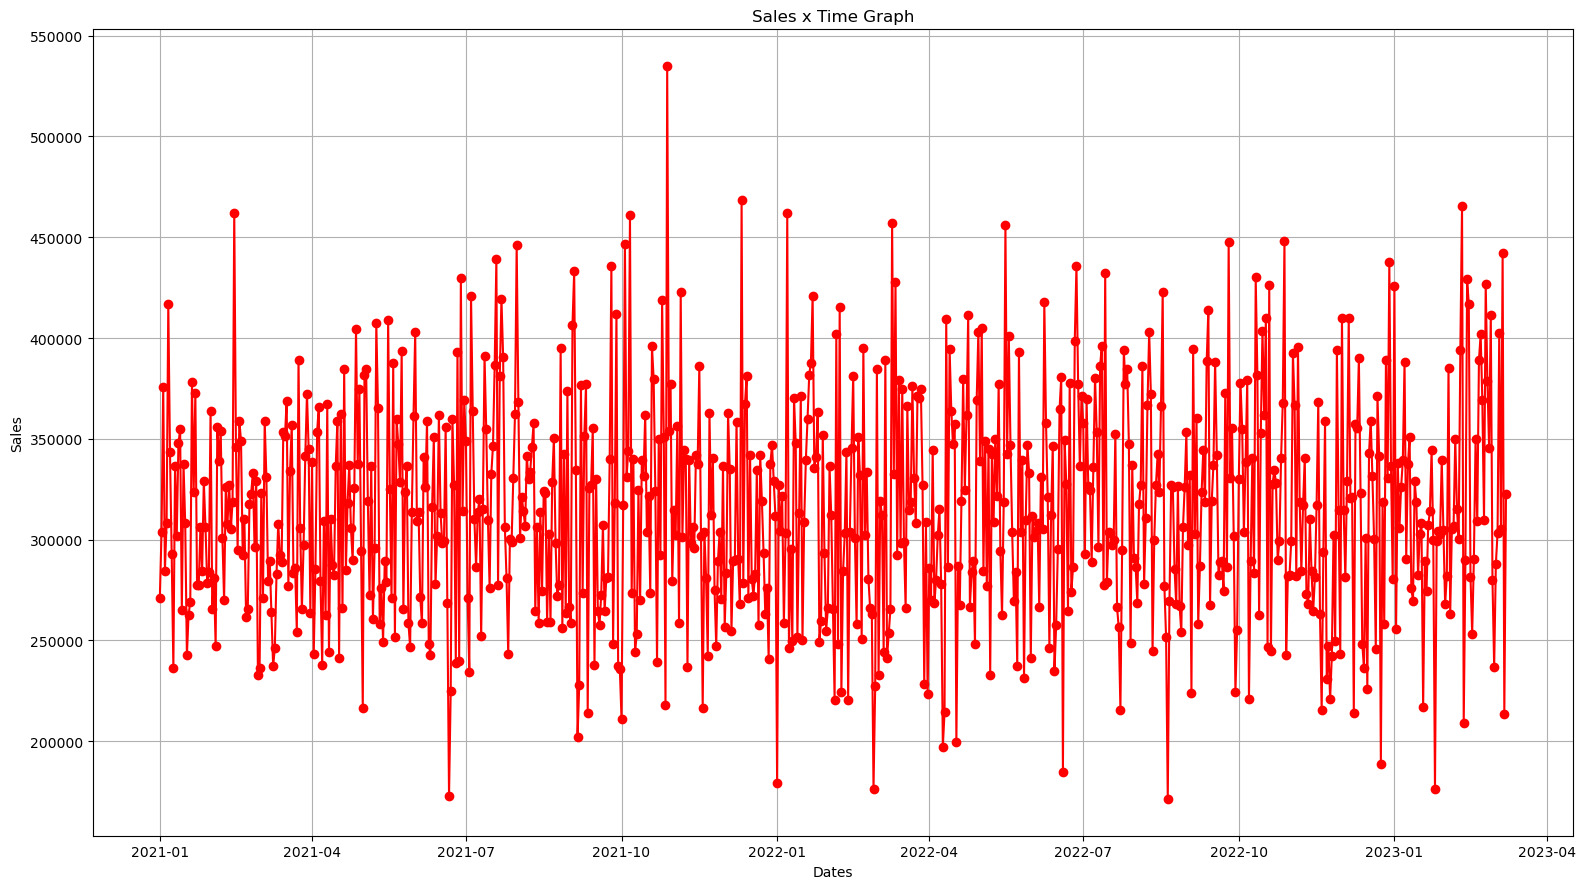

In [155]:
plt.figure(figsize=(16,9))
plt.plot(date_sales.index, date_sales.values, marker='o', linestyle='-',color='r',label='Sales')
plt.xlabel('Dates')
plt.ylabel('Sales')
plt.title('Sales x Time Graph')
plt.grid(True)
plt.tight_layout()
plt.show()

In [146]:
print('There is no visible trend or pattern in the data')

There is no visible trend or pattern in the data


# Hard

1. Create a pivot table showing the breakdown of sales across these dimensions, in this order: category, decade age range (e.g., 10-19, 20-29, and so forth).

In [149]:
merged_sales['decade_age_range'] = pd.cut(merged_sales['age'],bins=range(0,101,10),labels=['0-9','10-19','20-29','30-39','40-49','50-59','60-69','70-79','80-89','90-99'])

In [154]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.pivot_table(merged_sales, values='total_sales', index=['category','decade_age_range'], aggfunc=['sum','mean'],observed=False)

sum          mean
                                  total_sales   total_sales
category        decade_age_range                           
Books           0-9                      0.00           NaN
                10-19                19891.95    171.482328
                20-29                80128.35    166.587006
                30-39                84446.10    166.560355
                40-49                82946.25    170.320842
                50-59                79537.50    163.994845
                60-69                76234.80    170.166964
                70-79                56251.95    161.643534
                80-89                21103.95    142.594257
                90-99                    0.00           NaN
Clothing        0-9                      0.00           NaN
                10-19              3029007.52   3384.365944
                20-29             10079987.28   3244.283000
                30-39             11516170.16   3346.750991
                40-49             10933114.72   3272.407878
                50-59             10819684.48   3332.209572
                60-69             10004067.04   3299.494406
                70-79              7871098.40   3304.407389
                80-89              3739897.04   3318.453452
                90-99                    0.00           NaN
Cosmetics       0-9                      0.00           NaN
                10-19               178009.48    473.429468
                20-29               594733.82    442.510283
                30-39               722406.22    441.029438
                40-49               656740.32    452.924359
                50-59               621366.12    435.740617
                60-69               599735.00    455.725684
                70-79               427824.52    437.448384
                80-89               214684.80    435.466126
                90-99                    0.00           NaN
Food & Beverage 0-9                      0.00           NaN
                10-19                20433.61     57.397781
                20-29                74271.23     55.384959
                30-39                89187.19     57.801160
                40-49                85034.57     56.955506
                50-59                77686.42     55.490300
                60-69                76127.88     57.411674
                70-79                55584.44     57.600456
                80-89                25334.12     55.925210
                90-99                    0.00           NaN
Shoes           0-9                      0.00           NaN
                10-19              1367187.26   6271.501193
                20-29              6152942.84   6637.478792
                30-39              7178633.37   7010.384150
                40-49              6775319.13   6802.529247
                50-59              6268175.48   6739.973634
                60-69              5499357.71   6797.722756
                70-79              4718536.54   6599.351804
                80-89              2125201.97   6945.104477
                90-99                    0.00           NaN
Souvenir        0-9                      0.00           NaN
                10-19                20128.68    136.004595
                20-29                53570.91    122.029408
                30-39                63705.63    128.438770
                40-49                65007.66    134.036412
                50-59                57594.30    127.421018
                60-69                51482.97    125.262701
                70-79                38439.21    124.802630
                80-89                20234.25    126.464062
                90-99                    0.00           NaN
Technology      0-9                      0.00           NaN
                10-19              1772400.00  12481.690141
                20-29              5049450.00  11424.095023
                30-39              6231750.00  11735.875706
                40-49 